Using Convolutional Neural Network

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


m:\Cat_dog_classification\new_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
m:\Cat_dog_classification\new_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 89s 426ms/step - accuracy: 0.5560 - loss: 1.0661 - val_accuracy: 0.4997 - val_loss: 2.0019
Epoch 2/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 174s 866ms/step - accuracy: 0.6362 - loss: 0.6843 - val_accuracy: 0.5009 - val_loss: 1.4959
Epoch 3/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 207s 893ms/step - accuracy: 0.6654 - loss: 0.6290 - val_accuracy: 0.6415 - val_loss: 0.6908
Epoch 4/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 151s 750ms/step - accuracy: 0.6695 - loss: 0.6155 - val_accuracy: 0.7083 - val_loss: 0.5703
Epoch 5/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 227s 873ms/step - accuracy: 0.6908 - loss: 0.5837 - val_accuracy: 0.7102 - val_loss: 0.5661
Epoch 6/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 176s 874ms/step - accuracy: 0.7038 - loss: 0.5711 - val_accuracy: 0.6927 - val_loss: 0.5764
Epoch 7/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 113s 560ms/step - accuracy: 0.7207 - loss: 0.5482 - val_accuracy: 0.7389 - val_loss: 0.5304
Epoch 8/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 76s 377ms/step - accuracy: 0.7263 - l

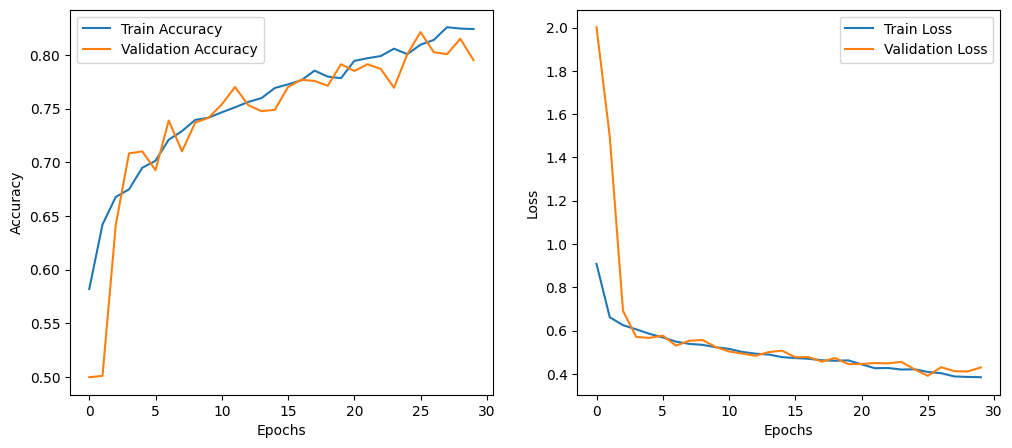

In [3]:
# Import Required Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping

#Preprocessing

# Define Dataset Paths
train_dir = "dataset/training_set/"
test_dir = "dataset/test_set/"

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting training and validation sets
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test

#Load Data Using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode="binary",
    subset="training"  
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode="binary",
    subset="validation" 
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode="binary"
)

#  CNN Model
def create_cnn_model():
    model1 = models.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(100, 100, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(256, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),  
        layers.Dense(1, activation="sigmoid")  # Binary Classification
    ])
    model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss="binary_crossentropy",
                  metrics=["accuracy"]) 
    return model1



# Choose Model
model1 = create_cnn_model()   

# Early Stopping (Prevents Overfitting)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Train the Model
history = model1.fit(
    train_generator,
    epochs=30,  
    validation_data=val_generator, 
    callbacks=[early_stopping]
)
print(history)

# Evaluate the Model
test_loss, test_acc = model1.evaluate(test_generator)
print(f" Test Accuracy: {test_acc:.2f}")

#  Plot Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Testing the model


In [4]:
from tensorflow.keras.preprocessing import image

#load the tesr dataset
classes = os.listdir("dataset/test_set/")
print(classes)

category2label = {"cats" :0, "dogs":1}
test_feature = []
test_label = []

for category in classes:
    folder = f"dataset/test_set/{category}"
    for img_name in os.listdir(f"{folder}"):
        image_path = f"{folder}/{img_name}"
        img = image.load_img(image_path, target_size=(100,100))
        img = image.img_to_array(img) / 255.0
        test_feature.append(img)
        test_label .append(category2label[category])

#convert into array
test_feature = np.array(test_feature)
test_label = np.array(test_label)

# Predict the test data
from sklearn.metrics import r2_score, classification_report
y_pred_prob = model1.predict(test_feature)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels


# Classification report
print("/nClassification report:/n",classification_report(test_label, y_pred, target_names=["Cat", "Dog"]))



['cats', 'dogs']
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step
/nClassification report:/n               precision    recall  f1-score   support

         Cat       0.86      0.80      0.83      1011
         Dog       0.81      0.87      0.84      1012

    accuracy                           0.83      2023
   macro avg       0.84      0.83      0.83      2023
weighted avg       0.84      0.83      0.83      2023



Test the individual image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


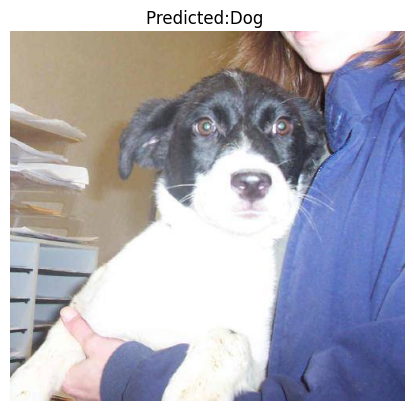

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


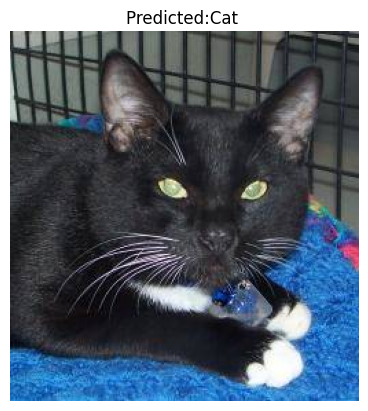

In [5]:
img_path1 = "dataset/test_set/dogs/dog.4010.jpg"
img_path2 = "dataset/test_set/cats/cat.4023.jpg"

picture_1 = image.load_img(img_path1, target_size=(100,100))
picture_1 = image.img_to_array(picture_1) /255.0
picture_1 = np.expand_dims(picture_1, axis=0)


picture_2= image.load_img(img_path2, target_size=(100,100))
picture_2 = image.img_to_array(picture_2) /255.0
picture_2 = np.expand_dims(picture_2, axis=0)

#1st image
img1 = plt.imread(img_path1)
plt.imshow(img1)
plt.axis("off") 
prediction = model1.predict(picture_1)[0][0]
result_1 = "Dog" if prediction > 0.5 else "Cat"
plt.title(F"Predicted:{result_1} " )
plt.show()


#2dn image
img1 = plt.imread(img_path2)
plt.imshow(img1)
plt.axis("off") 
prediction = model1.predict(picture_2)[0][0]
result_2 = "Dog" if prediction > 0.5 else "Cat"
plt.title(F"Predicted:{result_2} " )
plt.show()





Use the MobileNetV2 pretrained model for better accuracy

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


C:\Users\MouliLM10.Y4_MAX\AppData\Local\Temp\ipykernel_6952\4257206906.py:46: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(100, 100, 3))


Epoch 1/25


m:\Cat_dog_classification\new_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 54s 257ms/step - accuracy: 0.7990 - loss: 0.5198 - val_accuracy: 0.8804 - val_loss: 0.2573
Epoch 2/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 46s 228ms/step - accuracy: 0.8707 - loss: 0.2983 - val_accuracy: 0.8893 - val_loss: 0.2529
Epoch 3/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 46s 229ms/step - accuracy: 0.8713 - loss: 0.2910 - val_accuracy: 0.9160 - val_loss: 0.2056
Epoch 4/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 47s 232ms/step - accuracy: 0.8737 - loss: 0.2808 - val_accuracy: 0.9254 - val_loss: 0.1891
Epoch 5/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 47s 234ms/step - accuracy: 0.8763 - loss: 0.2751 - val_accuracy: 0.9219 - val_loss: 0.1996
Epoch 6/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 47s 235ms/step - accuracy: 0.8751 - loss: 0.2702 - val_accuracy: 0.9259 - val_loss: 0.1884
Epoch 7/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 47s 235ms/step - accuracy: 0.8864 - loss: 0.2568 - val_accuracy: 0.9021 - val_loss: 0.2422
Epoch 8/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - accuracy: 0.8806 - loss: 0.2771 - val_a

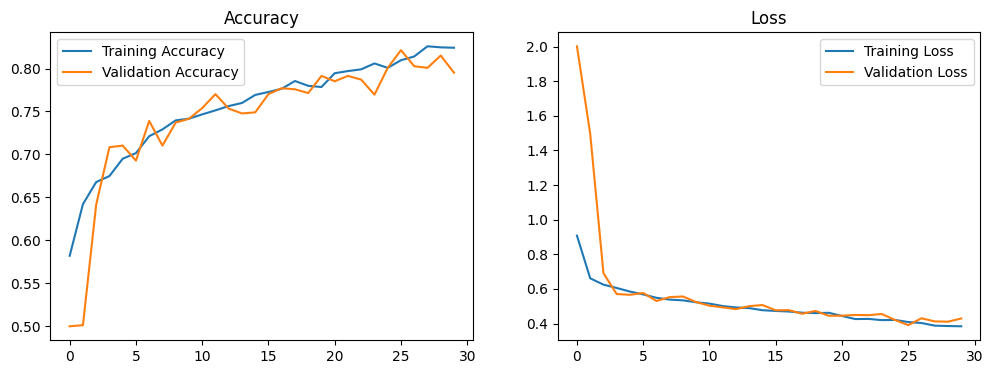

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os

# Set dataset paths
data_dir = "dataset/training_set/"
img_size = (100, 100)
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting training and validation sets
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Load Pretrained MobileNetV2 Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load Pretrained MobileNetV2 (Without the Top Dense Layers)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(100, 100, 3))
base_model.trainable = False  # Freeze the pretrained layers

# Build the Model on Top of MobileNetV2
model_2 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(1, activation="sigmoid")  # Binary Classification (Cat vs. Dog)
])

# Compile the Model
model_2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the Model
model_train = model_2.fit(train_generator, epochs=25, validation_data=test_generator)

test_loss, test_acc = model_2.evaluate(test_generator)
print(f" Test Accuracy: {test_acc:.2f}")
print(model_train)

# Evaluate Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


Testing Model_2

['cats', 'dogs']
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step
              precision    recall  f1-score   support

         Cat       0.95      0.91      0.93      1011
         Dog       0.91      0.95      0.93      1012

    accuracy                           0.93      2023
   macro avg       0.93      0.93      0.93      2023
weighted avg       0.93      0.93      0.93      2023



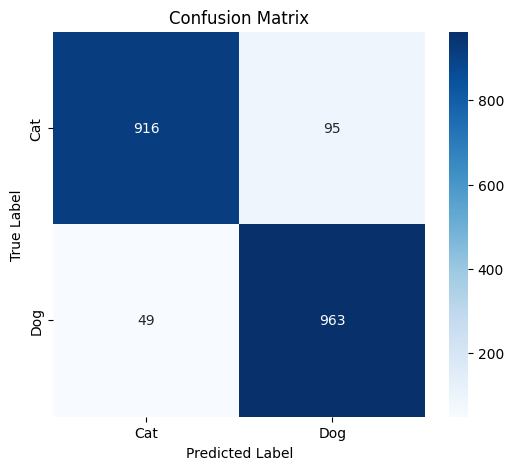

In [7]:

classes = os.listdir("dataset/test_set/")
print(classes)

category2label = {"cats" :0, "dogs":1}
test_feature = []
test_label = []

for category in classes:
    folder = f"dataset/test_set/{category}"
    for img_name in os.listdir(f"{folder}"):
        image_path = f"{folder}/{img_name}"
        img = image.load_img(image_path, target_size=(100,100))
        img = image.img_to_array(img) / 255.0
        test_feature.append(img)
        test_label .append(category2label[category])

test_feature = np.array(test_feature)
test_label = np.array(test_label)


# Predict the test data
from sklearn.metrics import classification_report, confusion_matrix
y_pred_prob = model_2.predict(test_feature)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels


# Classification report
print(classification_report(test_label, y_pred, target_names=["Cat", "Dog"]))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(test_label, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


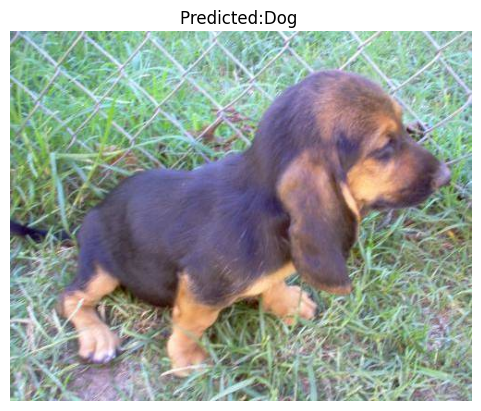

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


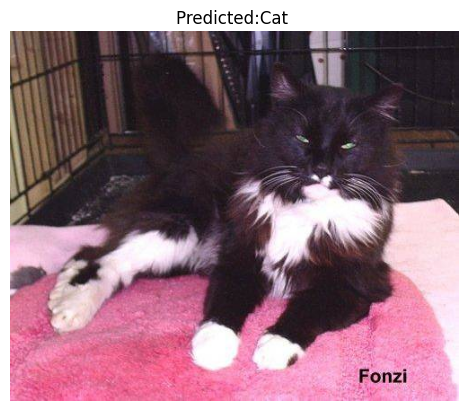

In [8]:
img_path1 = "dataset/test_set/dogs/dog.4009.jpg"
img_path2 = "dataset/test_set/cats/cat.4010.jpg"

picture_1 = image.load_img(img_path1, target_size=(100,100))
picture_1 = image.img_to_array(picture_1) /255.0
picture_1 = np.expand_dims(picture_1, axis=0)


picture_2= image.load_img(img_path2, target_size=(100,100))
picture_2 = image.img_to_array(picture_2) /255.0
picture_2 = np.expand_dims(picture_2, axis=0)

#1st image
img1 = plt.imread(img_path1)
plt.imshow(img1)
plt.axis("off") 
prediction = model_2.predict(picture_1)[0][0]
result_1 = "Dog" if prediction > 0.5 else "Cat"
plt.title(F"Predicted:{result_1} " )
plt.show()


#2dn image
img1 = plt.imread(img_path2)
plt.imshow(img1)
plt.axis("off") 
prediction = model_2.predict(picture_2)[0][0]
result_2 = "Dog" if prediction > 0.5 else "Cat"
plt.title(F"Predicted:{result_2} " )
plt.show()





In [10]:
model_2.save('trained_model_2.h5')
